In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [2]:
file_list

['../data/raw\\1_2024-05-09_23-01.csv',
 '../data/raw\\1_pages1_2_2024-06-03_19-15.csv',
 '../data/raw\\1_pages1_30_2024-05-23_11-22.csv',
 '../data/raw\\1_pages1_50_2024-05-22_00-17.csv',
 '../data/raw\\1_pages1_5_2024-05-26_20-49.csv',
 '../data/raw\\1_pages31_50_2024-05-26_02-24.csv',
 '../data/raw\\1_pages50_65_2024-05-22_00-40.csv',
 '../data/raw\\1_pages51_71_2024-05-26_20-40.csv',
 '../data/raw\\2_2024-05-09_23-16.csv',
 '../data/raw\\2_pages1_30_2024-05-23_11-24.csv',
 '../data/raw\\2_pages1_50_2024-05-22_00-22.csv',
 '../data/raw\\2_pages1_5_2024-05-26_20-50.csv',
 '../data/raw\\2_pages31_50_2024-05-26_02-25.csv',
 '../data/raw\\2_pages50_65_2024-05-22_00-42.csv',
 '../data/raw\\2_pages51_59_2024-05-26_20-43.csv',
 '../data/raw\\3_2024-05-09_23-24.csv',
 '../data/raw\\3_pages1_30_2024-05-23_11-28.csv',
 '../data/raw\\3_pages1_50_2024-05-22_00-28.csv',
 '../data/raw\\3_pages1_5_2024-05-26_20-49.csv',
 '../data/raw\\3_pages31_50_2024-05-26_02-26.csv',
 '../data/raw\\3_pages50_60

In [3]:
# main_dataframe = pd.read_csv(file_list[0], delimiter=',')
# for i in range(1, len(file_list)): 
#     data = pd.read_csv(file_list[i], delimiter=',') 
#     df = pd.DataFrame(data) 
#     main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [4]:
main_dataframe = pd.read_csv('../data/raw\\agg_data.csv',  delimiter=',')

In [6]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

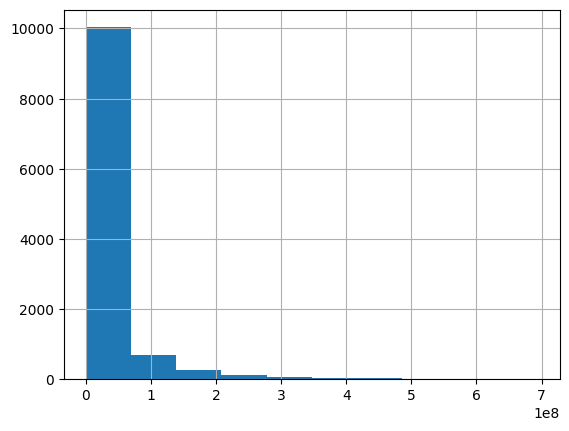

In [7]:
new_dataframe['price'].hist()

In [8]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_dataframe.copy()

In [11]:
new_df.price.describe().astype(float)

count    1.120700e+04
mean     3.456053e+07
std      5.299315e+07
min      8.000000e+05
25%      1.195022e+07
50%      1.667552e+07
75%      3.200000e+07
max      6.929600e+08
Name: price, dtype: float64

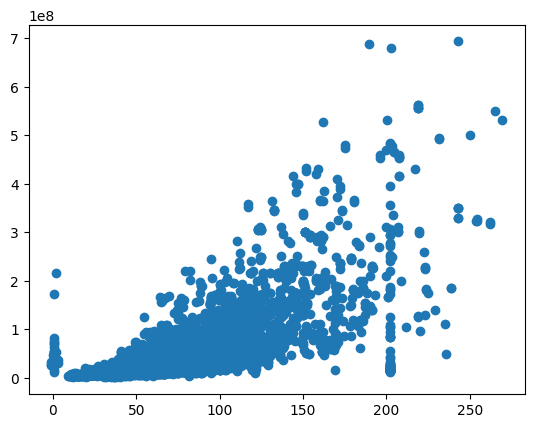

In [9]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()